In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

In [3]:
make_blobs?

In [4]:
X,Y = make_blobs(n_samples=500,n_features=2,centers=5,random_state=3)

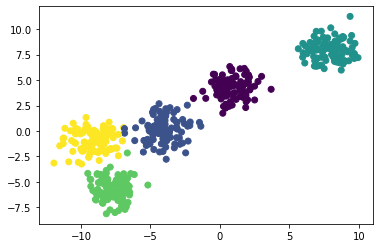

In [6]:
plt.scatter(X[:,0],X[:,1],c=Y)
plt.show()

In [64]:
k = 5
colours = ['yellow','green','blue','red','orange']
clusters = {}
centers = 10*(2*(np.random.random((k,2)))-1)

In [65]:
print(centers)

[[-1.25647105  0.46945024]
 [-4.86312202  3.64243314]
 [ 5.46777426  4.72964032]
 [-9.28213388  4.71331168]
 [-6.90145496 -6.18872989]]


In [66]:
for i in range(k):
    cluster = {
        'color':colours[i],
        'points':[],
        'center':centers[i]
   }
    clusters[i] = cluster

In [67]:
print(clusters)

{0: {'color': 'yellow', 'points': [], 'center': array([-1.25647105,  0.46945024])}, 1: {'color': 'green', 'points': [], 'center': array([-4.86312202,  3.64243314])}, 2: {'color': 'blue', 'points': [], 'center': array([5.46777426, 4.72964032])}, 3: {'color': 'red', 'points': [], 'center': array([-9.28213388,  4.71331168])}, 4: {'color': 'orange', 'points': [], 'center': array([-6.90145496, -6.18872989])}}


In [68]:
def distance(x1,x2):
    return np.sqrt(np.sum((x1-x2)**2))


In [69]:
def assign(clusters):                # E-Step
    for i in range(X.shape[0]):
        dist = []
        for j in range(k):
            dist.append(distance(X[i],clusters[j]['center']))
        
        ind = np.argmin(dist)
        clusters[ind]['points'].append(X[i])

In [70]:
def plotGraph(clusters):
    for i in range(k):
        for j in range(len(clusters[i]['points'])):
            plt.scatter(clusters[i]['points'][j][0],clusters[i]['points'][j][1],color=clusters[i]['color'])
            
    for i in range(k):
        plt.scatter(clusters[i]['center'][0],clusters[i]['center'][1],marker='^',color='black')
    plt.show()

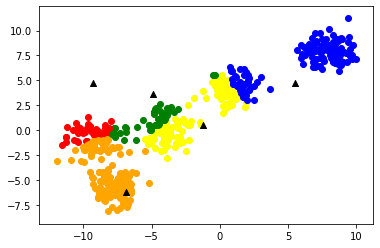

In [71]:
assign(clusters)
plotGraph(clusters)

In [72]:
def update(clusters):                      # M-Step
    for i in range(k):
        clusters[i]['center'] = np.mean(clusters[i]['points'],axis=0)
        clusters[i]['points'] = []
    

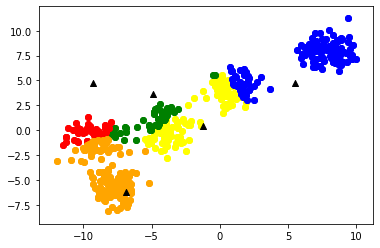

In [73]:
assign(clusters)
plotGraph(clusters)
update(clusters)

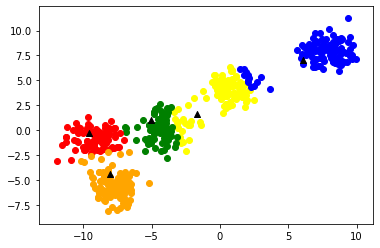

In [74]:
assign(clusters)
plotGraph(clusters)
update(clusters)

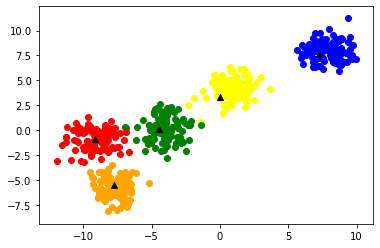

In [75]:
assign(clusters)
plotGraph(clusters)
update(clusters)

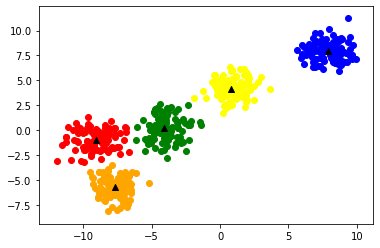

In [76]:
assign(clusters)
plotGraph(clusters)
update(clusters)

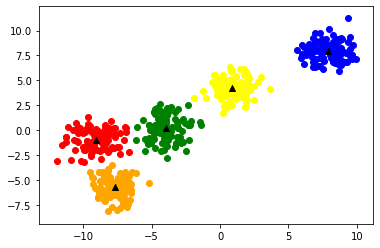

In [77]:
assign(clusters)
plotGraph(clusters)
update(clusters)

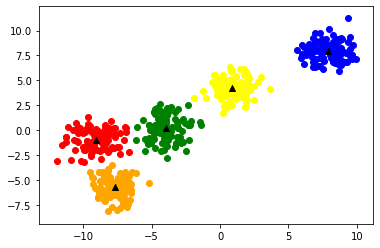

In [78]:
assign(clusters)
plotGraph(clusters)
update(clusters)

## K-Means++ using Sklearn


In [79]:
from sklearn.cluster import KMeans

In [80]:
kmeans = KMeans(n_clusters=5)

In [81]:
kmeans.fit(X,Y)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [82]:
kmeans.cluster_centers_  #for getting cluster center

array([[-3.97953526,  0.19458336],
       [ 7.8649674 ,  7.97988109],
       [ 0.88641907,  4.19441853],
       [-7.6726196 , -5.69211059],
       [-9.0671623 , -0.96740759]])

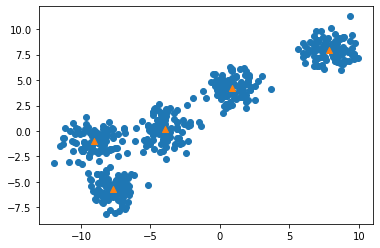

In [83]:
plt.scatter(X[:,0],X[:,1])
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],marker='^')
plt.show()

In [84]:
kmeans.labels_ #for labels

array([3, 1, 0, 3, 3, 0, 4, 3, 1, 3, 1, 0, 1, 3, 0, 3, 1, 3, 3, 1, 2, 2,
       3, 0, 3, 2, 4, 4, 0, 4, 3, 4, 2, 2, 3, 2, 1, 1, 3, 2, 2, 2, 4, 4,
       0, 1, 1, 4, 4, 4, 1, 3, 4, 3, 3, 2, 3, 3, 1, 0, 1, 0, 0, 3, 4, 1,
       0, 0, 2, 0, 2, 3, 2, 3, 2, 0, 3, 4, 2, 2, 0, 2, 0, 4, 1, 4, 0, 1,
       4, 0, 4, 2, 3, 2, 2, 1, 3, 0, 0, 2, 1, 2, 0, 0, 1, 1, 1, 0, 0, 3,
       1, 4, 3, 1, 0, 2, 1, 4, 2, 0, 1, 0, 4, 3, 2, 4, 4, 4, 3, 3, 0, 0,
       3, 1, 1, 4, 0, 4, 0, 3, 3, 2, 0, 1, 4, 3, 1, 1, 3, 0, 3, 3, 0, 0,
       1, 2, 2, 4, 0, 3, 2, 1, 4, 2, 1, 2, 1, 2, 2, 2, 4, 3, 2, 1, 2, 4,
       3, 0, 1, 4, 1, 3, 1, 2, 4, 4, 2, 3, 0, 1, 2, 0, 4, 3, 4, 2, 0, 4,
       3, 3, 3, 2, 2, 1, 3, 4, 4, 3, 1, 3, 3, 3, 2, 1, 0, 1, 3, 3, 1, 4,
       0, 4, 4, 2, 3, 0, 3, 0, 4, 2, 0, 0, 3, 2, 3, 2, 0, 1, 0, 2, 2, 1,
       3, 3, 0, 0, 2, 1, 2, 3, 4, 1, 4, 3, 4, 4, 4, 4, 1, 2, 1, 3, 2, 1,
       4, 0, 1, 1, 1, 4, 3, 3, 0, 2, 2, 1, 0, 0, 3, 0, 4, 0, 1, 1, 4, 4,
       2, 4, 4, 1, 2, 3, 0, 2, 0, 4, 0, 0, 1, 3, 2,

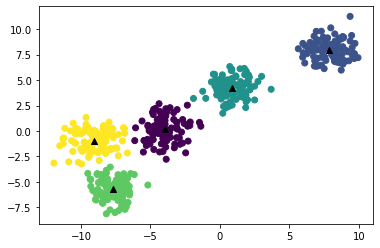

In [87]:
plt.scatter(X[:,0],X[:,1],c=kmeans.labels_)
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],marker='^',color='black')
plt.show()